# Contruye tu primera red neuronal desde cero

La IA ha revolucionado al mundo, haciendo posible avances en ciertos campos que antes se veían a años luz. Hay mucho ruido acerca de "palabros" raros como Transformers, Atención, Embeddings, CNNs...

Todo eso está genial, y es el estado del arte sobre el que se apoya todo lo que usamos a día de hoy (por ejemplo, los LLM o modelos de visión). Sin embargo, todo esto esta cimentado por una base muy sólida, y, he prepado este notebook para que todos salgais de esta charla conociendola.

Mi objetivo es que al salir todos comprendais: 
1. ¿Qué es una red neuronal?
2. ¿Cómo aprende una red neuronal?

Me he dado cuenta en este tiempo que usar un modelo realmente no es tan complejo, lo complejo es comprenderlo e implementarlo por ti mismo. Es por esto que, inspirado por la frase de Richard Feynman "Lo que no puedo crear, no lo entiendo", os propongo que creeis con ayuda de este notebook y mia vuestra primera red neuronal desde cero.

Cuando digo desde cero es desde cero, no vamos a usar ningun framework super conocido, como puede ser PyTorch o Tensorflow. Nos apoyaremos en Python puro y un paquete que sirve para trabajar con arrays llamado "numpy".

Antes de empezar, vamos a instalar los paquetes necesarios:

In [46]:
!pip install numpy matplotlib tqdm

  Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)


You should consider upgrading via the 'C:\Users\Jose Antonio\Desktop\ScriptsProyectos\own\youtube\make_your_first_net\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


### ¿Qué es una red neuronal?

Una red neuronal puede definirse como: 
1. Un modelo computacional inspirado en el cerebro humano, formado por nodos (neuronas artificiales) que procesan información y aprenden a partir de datos.
2. Un conjunto de algoritmos diseñados para reconocer patrones mediante el ajuste de pesos que conectan múltiples capas de neuronas.
3. Una estructura matemática que transforma entradas en salidas mediante funciones no lineales y aprendizaje automático.
4. Un sistema de aprendizaje que aproxima funciones complejas aprendiendo representaciones internas de los datos.

Y la lista sigue y sigue...

Con lo que teneis que quedaros es que una red neuronal no es más que un modelo que aprende patrones en datos y resuelve tareas como clasificación o predicción. El ejemplo mas sencillo, y que nos sirve para aprender la base de todo es el perceptron multicapa, que fue propuesto en 1958 por Frank Rosenblatt.

#### Perceptron multicapa

![MLP](images\mlp_basico_anotado.png)

A pesar del jaleo que se ve ahí, esto es realmente sencillo. Esta red esta formada por 3 tipos de capas como podemos ver, veamos que hace cada una:
1. Capa de entrada: Esta capa no es más que la capa que recibe los datos y los pasa a la siguiente capa, así de sencillo.
2. Capas ocultas: Recibe la salida de la capa anterior, calcula combinaciones ponderadas, e introducen no linealidad (de esta forma se aprenden relaciones complejas)
3. Capa de salida: Reciben la salida de la última capa oculta y generan el resultado final

### Cómo se entrena una red neuronal. Concepto.

Para entrenar cualquier tipo de red neuronal se usa un algoritmo conocido como "descenso del gradiente". La idea de este es muy sencilla a la vez que poderosa.

El algoritmo cuenta con tan solo dos pasos:
1. Forward: En este, la red neuronal recibe un dato de entrada, y lo propaga hasta el final (se aplican todas las operaciones), obteniendose un valor de salida.
2. Backward: Se mira como de acertada es la salida de la red, y, en base a esto, se calcula el gradiente de cada peso respecto de esa pérdida. Esto lo que nos dice es como hay que actualizar los pesos de nuestra red para disminuir el error de la salida.

#### Forward

Para entender el paso forward, es necesario entender cómo funciona cada parte de una red neuronal, y que operaciones se realizan. Para esto solo hay que entender que hace cada nodo o neurona de la red. Para esto vamos a coger de ejemplo la primera neurona de nuestra red y vamos a entender que ocurre cuando enviamos datos por las capas de entrada.

![Neuron](images\neuron.png)

La neurona $h1_1$ realiza lo que se llama una suma ponderada, es decir, coge cada una de las entradas que vienen de $x_1$, $x_2$ y $x_3$ y las multiplica por un peso $w_1$, $w_2$ y $w_3$, respectivamente. De esta forma: $$z = w_1x_1 + w_2x_2 + ... + w_nx_n$$

Además de esto, generalmente las neuronas suman un término conocido como "bias". La función de este término es la de desplazar la frontera de decisión de nuestro modelo para que esta no pase siempre por el origen. En términos sencillos, si imaginamos que nuestra neurona es un interruptor que cuando la entrada pasa un umbral se activa, sería como darle la habilidad a este de ajustar el umbral. Por ende, la ecuación ahora queda: $$z = w_1x_1 + w_2x_2 + ... + w_nx_n + b$$

Pero... ¡esto no es más que una regresión lineal! ¿Dónde está lo novedoso?

![meme_lr](images\linear_regression.jpeg)

La realidad es que hasta ahora no hay nada novedoso. Sin embargo, lo bueno que tienen las redes neuronales es que permiten aprender patrones no lineales en los datos. ¿Qué quiere decir esto? Y, ¿cómo van a encontrar patrones no lineales si hasta ahora son una simple regresión lineal?

Veamos que quiere decir que encuentran patrones no lineales. Supongamos que tenemos este conjunto de datos, donde tenemos 2 clases, y tenemos que trazar una linea que separe los datos de una clase y de la otra. ¿Cómo lo haríais?

![MLP](images\decision_boundary_lineal.png)

La realidad es que no se puede. No hay una linea que separe bien ambos conjuntos. Sin embargo, ¿y si os digo que teneis completa libertad para dibujar una frontera que los separe? ¿Y si ya no estais sujetos a usar una única línea? Esto, en resumidas cuentas, es el concepto de "no linealidad".

![MLP](images\decision_boundary_nolineal.png) 

Como podemos ver, con no linealidad, somos de encontrar el patrón complejo que describen estos datos, y definir una frontera perfecta. De esta forma, si me viene un dato nuevo, se decir en que parte de la zona está, y, por ende, se clasificarlo.

Ahora que sabemos que es la "no linealidad", vamos a entender como sacamos no linealidad de algo que hasta ahora es completamente lineal, como lo es la ecuación descrita antes.

El truco es que todavía no hemos terminado de ver que hace una neurona. Una neurona, aplica tras hacer esa suma ponderada, una llamada "función de activación". Esta función de activación es una función no lineal, y, por eso, cuando la aplicamos, la red aprende patrones no lineales, porque la ecuación que describe lo que hace una neurona deja de ser lineal.

Hay muchas funciones de activación, pero la más tipica es la Rectified Linear Unit (ReLU). Esta viene descrita por la ecuación $$
f(x) = \max(0, x)
$$ Que graficamente sería:

![MLP](images\relu.png) 

Como se puede ver, la función no es lineal, y por esto mismo, se introduce no linealidad en la red.

Recapitulando entonces, la ecuación que describe la salida de nuestra neurona frente es: $$z = ReLU(w_1x_1 + w_2x_2 + ... + w_nx_n + b)$$

Una vez comprendido esto, es sencillo crear el forward de nuestra red neuronal, pues simplemente hay que replicar este cálculo para todas las neuronas. ¡Procedemos a programar!

## A construir

Cabe destacar que mi intención en esta charla no es la programación, osea que usaremos código sencillo y legible a pesar de que no sea robusto ni escalable.

La tarea que nuestra red usará es la de clasificar imagenes de dígitos escritos a mano.

### Dataset

MNIST cuenta con imágenes de dígitos escritos a mano desde el 0 hasta el 9, por lo que tiene 10 clases entre las que clasificar. Las imagenes tienen un formato de (1x28x28), esto es, que son imagenes en escala de grises (un solo canal de color), 28 pixeles de ancho y 28 pixeles de alto. Empezamos por descargar el dataset.

In [2]:
import numpy as np
import urllib.request

url = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz"
path = "mnist.npz"

urllib.request.urlretrieve(url, path)

with np.load(path) as data:
    x_train = data["x_train"]
    y_train = data["y_train"]
    x_test  = data["x_test"]
    y_test  = data["y_test"]

print("Train:", x_train.shape, y_train.shape)
print("Test:", x_test.shape, y_test.shape)

Train: (60000, 28, 28) (60000,)
Test: (10000, 28, 28) (10000,)


Como podemos ver, tenemos 60.000 imagenes en nuestro conjunto de datos para entrenamiento, y 10.000 imagenes para testear nuestro modelo. Vamos a observar como son estas imagenes.

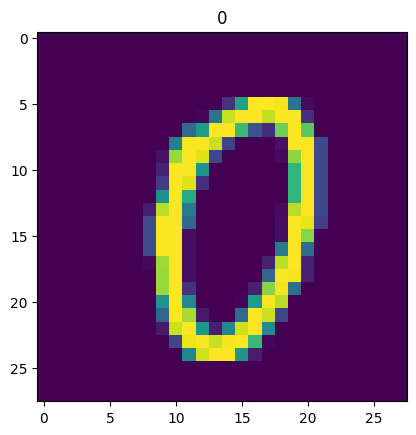

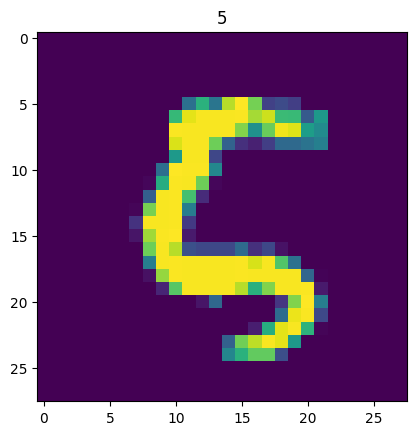

In [3]:
from matplotlib import pyplot as plt

def plot_mnist(idx: int):
    plt.figure()
    plt.imshow(x_train[idx])
    plt.title(y_train[idx])
    plt.show()

plot_mnist(1000)
plot_mnist(2000)

#### Perceptrón multicapa

Ahora que ya hemos ojeado un poco el dataset, vamos a ver como podemos crear nuestra red neuronal.

In [4]:
np.random.seed(42)

In [5]:
class Neuron:
    def __init__(self, in_features: int):
        self.in_features = in_features

        self.weights = np.random.uniform(-1, 1, (in_features,))
        self.bias = 0.0

    
    def forward(self, X: np.ndarray):
        pass
    

Aquí merece la pena detenerse un momento. Por lo que hemos visto, los pesos son el motor de la red, puesto que esta aprende ajustandolos. Si nos fijamos, hemos definidos estos como un array con valores aleatorios entre -1 y 1. Es interesante entender que esta inicialización puede hacer que la red aprenda mejor o peor, pues si el set de pesos aleatorios $W$ queda muy lejos de nuestro set "óptimo" $W_{opt}$, la red no aprenderá bien o tardará mucho más.

Existen ciertas inicializaciones de pesos, que son matemáticamente más correctas. Vamos a usar una conocida como inicialización He, la cual está diseñada para usar con la función de activación ReLU y consiste en inicializar pesos aleatorios pero ajustar su varianza como $$ \sigma^2 = 2/N$$
Donde $N$ es el número de entradas a la neurona.

In [6]:
def he_init(fan_in: int):
    return np.random.randn(fan_in) * np.sqrt(2.0 / fan_in)    

In [7]:
class Neuron:
    def __init__(self, in_features: int):
        self.in_features = in_features

        self.weights = he_init(fan_in=in_features)
        self.bias = 0.0

    
    def forward(self, X: np.ndarray):
        pass

In [8]:
neuron = Neuron(in_features=10)
print(neuron.weights)

[ 0.22213732 -0.06183368  0.28965512  0.68111966 -0.10471657 -0.10470923
  0.70624544  0.34320724 -0.20995533  0.24264023]


Procedemos, una vez que sabemos como inicializar una neurona, a implementar la acción que realiza (la ecuación que hemos visto antes). Para esto, procedemos a definir la función ReLU.

In [9]:
def relu(x: float):
    return max(0, x)

In [10]:
class Neuron:
    def __init__(self, in_features: int):
        self.in_features = in_features
        
        self.weights = he_init(fan_in=in_features)
        self.bias = 0.0

        
    def forward(self, X: np.ndarray):
        # Dada una entrada X, nuestra neurona aplica la suma ponderada y después la función ReLU
        z = self.weights @ X + self.bias  # @ significa multiplicación de matrices
        z = relu(z)
        return z
        

In [11]:
neuron = Neuron(in_features=10)
print(neuron.forward(X=np.random.randn(10)))

2.3639929142211944


Ahora que podemos definir neuronas, toca aprender a definir capas enteras (conjunto de neuronas).

In [12]:
class Layer:
    def __init__(self, n_inputs: int, n_neurons: int):
        """ n_inputs: número de entradas para cada una de las neuronas (que es igual al número de neuronas en la capa anterior)
            n_neurons: número de neuronas en la capa """
        self.n_inputs = n_inputs
        self.n_neurons = n_neurons

        self.neurons = [Neuron(n_inputs) for i in range(n_neurons)]

    def forward(self, X: np.ndarray):
        return np.array([neuron.forward(X) for neuron in self.neurons])  # Array 1D con shape (n_neurons,)

    def __repr__(self):
        return f"Layer(n_inputs={self.n_inputs}, n_neurons={self.n_neurons})"
        

Una vez sabemos como definir capas, ahora toca construir nuestro Perceptrón Multicapa.

In [13]:
class MLP:
    def __init__(self, sizes: list[int]):
        """
        sizes: número de neuronas de cada capa
        """
        self.sizes = sizes
        self.n_layers = len(sizes) - 1  # -1 ya que no contamos con la de entrada
        self.layers = []

        for i in range(self.n_layers):
            in_features = sizes[i]
            out_features = sizes[i + 1]
            self.layers.append(Layer(n_inputs=in_features, n_neurons=out_features))

    def forward(self, X: np.ndarray) -> np.ndarray:
        for layer in self.layers:
            X = layer.forward(X)
        return X

        

In [14]:
mlp = MLP([10,20,30,10])

In [15]:
print(mlp.layers)

[Layer(n_inputs=10, n_neurons=20), Layer(n_inputs=20, n_neurons=30), Layer(n_inputs=30, n_neurons=10)]


In [16]:
mlp.forward(X=np.random.randn(10))

array([0.        , 0.93322177, 3.1137477 , 0.        , 0.        ,
       1.50826623, 0.        , 0.        , 0.37490697, 1.4783555 ])

Con esto, ya hemos concluido casi todo el primer paso de nuestro algoritmo. Hemos sido capaces de definir todo el flujo que sigue un dato desde que entra a la red hasta que sale.

Lo siguiente, es definir una función de pérdidas que sea capaz de indicarnos cuanto se ha equivocado nuestro modelo. Las funciones de pérdidas son dependientes de la tarea que queremos resolver, y generalmente, para clasificación, se suele usar la función CrossEntropy.

Sin embargo, puesto que nuestro objetivo es didáctico y no de rendimiento, usaremos la función MSE, la cual toma la forma 
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2
$$

Donde:
1. n es el número de datos
2. $Y_i$ son los valores reales
3. $\hat{Y}_i$ son los valores predichos por nuestra red

In [17]:
def mse_loss(y_pred: np.array, y_true: np.array):
    return np.square(np.subtract(y_true, y_pred)).mean()

Ahora vamos a mandar un dato real del dataset mnist, vamos a ejecutar el forward con este dato, y vamos a aplicar la función de pérdidas. Si esto funciona, simplemente queda implementar el segundo paso y podremos facilmente entrenar nuestar red.

In [18]:
image = x_train[1000]
label = y_train[1000]


# Definimos nuestro MLP
mlp = MLP([28*28, 120, 10])  # 3 capas, la primera con tantas neuronas como pixeles tiene una imagen de mnist, la ultima con el número de clases

logits = mlp.forward(image.ravel() / 255.0)  # Normalizamos entr 0-1
print(logits)

[0.27839162 0.39019326 0.         0.         0.33204118 0.72728531
 1.51360928 0.         0.         0.        ]


Estos valores a la salida del paso forward, si nos fijamos, no son probabilidades, puesto que no suman 1. Nuestra idea es que nuestra red nos de una distribución de probabilidades, donde la probabilidad de la clase correcta sea la más alta. Para convertir estos números a una distribución de probabilidad se usa la función softmax:

$$ softmax(x_i) = \frac{e^{x_i}}{\sum_{j}e^{x_j}} $$

In [19]:
def softmax(logits: np.array) -> np.array:
    exp = np.exp(logits - np.max(logits))  # la resta del máximo es para estabilidad numérica
    return exp / np.sum(exp)

In [20]:
probs = softmax(logits)
print(probs)

[0.0835833  0.09347045 0.06327258 0.06327258 0.08818998 0.13093977
 0.28745358 0.06327258 0.06327258 0.06327258]


Finalmente, podemos aplicar la función de pérdidas que hemos definido antes a esta distribución de probabilidad. Para ello, nuestra etiqueta debe ser un vector "one-hot", lo cual quiere decir que debe ser codificado de la siguiente forma:

In [21]:
def make_onehot_label(label: int):
    return np.array([1 if i == label else 0 for i in range(10)])

print(f"Para la etiqueta 0 el vector codificado es {make_onehot_label(0)}")
print(f"Para la etiqueta 1 el vector codificado es {make_onehot_label(1)}")

Para la etiqueta 0 el vector codificado es [1 0 0 0 0 0 0 0 0 0]
Para la etiqueta 1 el vector codificado es [0 1 0 0 0 0 0 0 0 0]


In [22]:
loss = mse_loss(y_pred=probs, y_true=make_onehot_label(label))
print(loss)

0.09761256510728968


¡Y listo! ¡Ya tenemos definida toda la primera parte del algoritmo comentado antes! Somos capaces de definir una red de tamaño arbitrario, enviar una imagen a través de ella, convertir sus salidas a probabilidades, y medir el error de la red. Ahora queda la segunda parte, definir la propagacion de este error.

Para esto, vamos a reescribir las clases, modificando pequeñas partes y añadiendo la función "backward".

In [50]:
class Neuron:
    def __init__(self, in_features: int):
        self.in_features = in_features
        
        self.weights = he_init(fan_in=in_features)
        self.bias = 0.0

        self.cache = {}  # Aquí almacenamos nuestra entrada, nuestra combinación lineal con pesos, y nuestra salida

    def forward(self, X: np.ndarray):
        # Dada una entrada X, nuestra neurona aplica la suma ponderada y después la función ReLU
        z = self.weights @ X + self.bias  # @ significa multiplicación de matrices
        a = relu(z)

        # guardado de nuestro valores
        self.cache["A"] = a
        self.cache["Z"] = z
        self.cache["X"] = X
        
        return a

    def backward(self, grad_out: float, lr: float):
        """ 
        grad_out: el gradiente que proviene de la capa siguiente
        lr: el ratio de aprendizaje
        """
        X, Z, A = self.cache["X"], self.cache["Z"], self.cache["A"]

        # Lo primero que hacemos es quitar la función de activación (pasar de A a Z)
        dZ = grad_out * (1.0 if Z > 0 else 0.0)  # grad_out * (la derivada de la relu)

        # Ahora calculamos la derivada de la pérdida con respecto de los pesos y del bias
        dW = dZ * X
        db = dZ

        # Gradiente que enviamos hacia la capa anterior
        dX = dZ * self.weights

        # Actualizamos pesos minimizando gradiente
        self.weights -= lr * dW
        self.bias -= lr * db

        return dX

        
        

Para arrojar un poco de luz, esto no es mas que hacer uso de la regla de la cadena:

1. Queremos conocer la derivada de la pérdida con respecto a los pesos, para saber como afecta cada peso al error y modificarlo para minimizar este error.
2. La fórmula que describe esto es$$
\frac{\partial L}{\partial W_i}
= 
\frac{\partial L}{\partial A} \cdot
\frac{\partial A}{\partial Z} \cdot
\frac{\partial Z}{\partial W_i}
$$ Donde: $\frac{\partial L}{\partial A}$ es grad_out (lo que cambia la pérdida si cambia la salida de la neurona), $\frac{\partial A}{\partial Z}$ es la derivada de la función ReLU, y $\frac{\partial Z}{\partial W_i}$, dado que $Z = W_i \cdot X_i + b$, no es más que $X_i$
 
3. Por esto, $\frac{\partial L}{\partial W_i}$  = $grad_{out}$ $\cdot$ (1.0 if Z > 0 else 0.0) $\cdot$ $X$
4. Para $\frac{\partial L}{\partial b}$, solo cambia la última derivada que en lugar de ser $\frac{\partial Z}{\partial W_i}$ es $\frac{\partial Z}{\partial b}$, que es 1 si atendemos a $Z = W_i \cdot X_i + b$
5. Cada neurona hace dos cosas, la primera es actualizar sus pesos, restandose a si mismo $\frac{\partial L}{\partial W_i}$ multiplicada por una "tasa de aprendizaje", que indica como de brusca será nuestar actualización de pesos. La segunda es enviar un gradiente hacia la capa anterior, el cual le dice cuanto afectó su salida al error total.
6. Este gradiente que se envía hacia atrás no es más que $\frac{\partial L}{\partial X}$, que es $grad_{out}$ $\cdot$ (1.0 if Z > 0 else 0.0) $\cdot$ $W$

Una vez explicado como hacer backward en cada neurona, procedemos a implementar el método en la capa. Este simplemente calculará el backward de cada neurona y devolverá la suma de todas hacia la capa anterior.

In [51]:
class Layer:
    def __init__(self, n_inputs: int, n_neurons: int):
        """ n_inputs: número de entradas para cada una de las neuronas (que es igual al número de neuronas en la capa anterior)
            n_neurons: número de neuronas en la capa """
        self.n_inputs = n_inputs
        self.n_neurons = n_neurons

        self.neurons = [Neuron(n_inputs) for i in range(n_neurons)]

    def forward(self, X: np.ndarray):
        return np.array([neuron.forward(X) for neuron in self.neurons])  # Array 1D con shape (n_neurons,)

    def backward(self, grad: np.ndarray, lr: float) -> np.ndarray:
        """
        grad: vector (n_neurons,) con dL/dA_k para cada neurona k de la capa.
        Devuelve dX_total: vector (n_inputs,) para enviar a la capa anterior.
        """
        dX_total = np.zeros(self.n_inputs, dtype=float)
        for gk, neuron in zip(grad, self.neurons):
            # Cada neurona devuelve su dX_k; sumamos todas las contribuciones
            dX_total += neuron.backward(float(gk), lr)
        return dX_total 
    
    def __repr__(self):
        return f"Layer(n_inputs={self.n_inputs}, n_neurons={self.n_neurons})"
        

Y finalmente en la clase MLP

In [52]:
class MLP:
    def __init__(self, sizes: list[int]):
        """
        sizes: número de neuronas de cada capa
        """
        self.sizes = sizes
        self.n_layers = len(sizes) - 1  # -1 ya que no contamos con la de entrada
        self.layers = []

        for i in range(self.n_layers):
            in_features = sizes[i]
            out_features = sizes[i + 1]
            self.layers.append(Layer(n_inputs=in_features, n_neurons=out_features))

    def forward(self, X: np.ndarray) -> np.ndarray:
        for layer in self.layers:
            X = layer.forward(X)
        return X

    def backward(self, grad_out: np.ndarray, lr: float) -> np.ndarray:
        G = grad_out
        for layer in reversed(self.layers):
            G = layer.backward(G, lr)   # cada capa devuelve dX para la anterior
        return G

Esto sería todo, salvo que queda una pequeña cosa. Nuestro método backward calcula el gradiente para las capas de la red, pero no tiene en cuenta como hacerlo para la última capa, pues esto depende de las softmax y del error. Para esto definimos la siguiente función:

In [53]:
def d_mse(probs: np.array, labels: np.array):
    grad_a = 2 * (probs - labels)  # mirar definición de mse y derivar frente a probs

    # quitar softmax
    dot = np.dot(grad_a, probs)                # escalar
    grad_z = probs * (grad_a - dot)

    return grad_z

¡Ahora sí! Ya tenemos todas las piezas y podemos crear un bucle de entrenamiento para ver si nuestra red aprende a hacer esta tarea.

Generalmente, un bucle de entrenamiento es mucho más sofisticado, y por ejemplo, se envían los datos a la red en lotes, lo cual hace que el entrenamiento sea más estable y las redes aprendan de más ejemplos por iteración. Sin embargo, nosotros vamos a hacer las cosas sencillas y vamos a enviar las imágenes una a una.

Vamos a definir una clase dataset, la cual se encargará de gestionar los datos del dataset MNIST.

In [54]:
class Dataset:
    def __init__(self, x: np.array, y: np.array):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx: int):
        image = self.x[idx].ravel() / 255.0
        label = make_onehot_label(self.y[idx])
        return image, label    

Ahora procedemos a crear nuestro bucle de entrenamiento, que simplemente es usar los pasos que ya hemos definido.

In [59]:
from tqdm import tqdm

def train(model, lr, dataset):
    losses = []
    for i in range(len(dataset)):
        image, label = dataset[i]  # extraemos datos del dataset
        logits = model.forward(image)  # enviamos al modelo
        probs = softmax(logits)  # calculamos distribución de probabilidad
        loss = mse_loss(y_pred=probs, y_true=label)  # sacamos el error
        losses.append(loss)
        
        grad = d_mse(probs=probs, labels=label)
        model.backward(grad_out=grad, lr=lr)

    print(f"Mean loss in epoch is {np.mean(np.array(losses))}")
    
    return model

def test(model, dataset):
    losses = []
    for i in range(len(dataset)):
        image, label = dataset[i]
        logits = model.forward(image)
        probs = softmax(logits)
        loss = mse_loss(y_pred=probs, y_true=label)
        losses.append(loss)
    print(f"Mean loss in epoch is {np.mean(np.array(losses))}")
    
        

In [60]:
model = MLP([28*28, 120, 10])
lr = 0.001
epochs = 10

for i in range(epochs):
    print(f"Epoch {i+1} out of {epochs}")
    model = train(model=model, lr=lr, dataset = dataset_train)
    test(model=model, dataset=dataset_test)

Epoch 1 out of 10
Mean loss in epoch is 0.03502896172086226
Mean loss in epoch is 0.02294830420443723
Epoch 2 out of 10
Mean loss in epoch is 0.021550378037060555
Mean loss in epoch is 0.02001081745825722
Epoch 3 out of 10
Mean loss in epoch is 0.019339678690497894
Mean loss in epoch is 0.018620345290762366
Epoch 4 out of 10
Mean loss in epoch is 0.018018027066018266
Mean loss in epoch is 0.017689882019464424
Epoch 5 out of 10
Mean loss in epoch is 0.017050428096633877
Mean loss in epoch is 0.01700240601490804
Epoch 6 out of 10
Mean loss in epoch is 0.016290885349972195
Mean loss in epoch is 0.016444158217062663
Epoch 7 out of 10
Mean loss in epoch is 0.01567834271037792
Mean loss in epoch is 0.01599143129363492
Epoch 8 out of 10
Mean loss in epoch is 0.015174842633987468
Mean loss in epoch is 0.015614485267687073
Epoch 9 out of 10
Mean loss in epoch is 0.014750804137048249
Mean loss in epoch is 0.01530035171341647
Epoch 10 out of 10
Mean loss in epoch is 0.014389692738088588
Mean loss

In [81]:
import random

def random_pred(model, dataset_test):
    """ Esta funcion usa el modelo entrenado para predecir sobre una imagen aleatoria
    y muestra el resultado """

    random_idx = random.randint(1, len(dataset_test)-1)
    image, label = dataset_test[random_idx]

    logits = model.forward(image)
    probs = softmax(logits)
    predicted = np.argmax(probs)
    true = np.argmax(label)

    if true == predicted:
        return 1
    return 0

# 30 predicciones
preds = []
for i in range(30):
    preds.append(random_pred(model=model, dataset_test=dataset_test))
    
accuracy = (np.sum(preds) / len(preds)) * 100
print(f"Nuestro modelo tiene una accuracy de {accuracy}")      

Nuestro modelo tiene una accuracy de 90.0
